In [62]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# reading the data
df = pd.read_csv('Stocks1/aaba.us.txt', delimiter = ",")
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1996-04-12,1.05,1.790,1.02,1.38,408720000,0
1,1996-04-15,1.49,1.500,1.25,1.34,79231200,0
2,1996-04-16,1.34,1.340,1.17,1.20,48026400,0
3,1996-04-17,1.18,1.180,1.03,1.12,42871200,0
4,1996-04-18,1.25,1.250,1.17,1.22,27352800,0
...,...,...,...,...,...,...,...
5429,2017-11-06,70.27,71.960,70.27,71.71,7129828,0
5430,2017-11-07,72.20,72.470,71.62,72.22,9161521,0
5431,2017-11-08,72.00,72.200,71.09,71.16,7363365,0
5432,2017-11-09,70.46,70.680,68.77,70.19,10054663,0


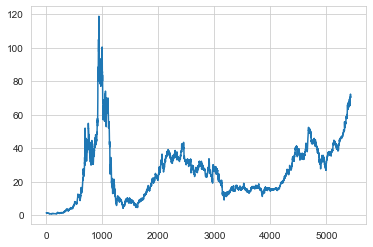

In [69]:
sns.set_style("whitegrid")
plt.plot(df["Close"])

In [74]:
# This is a function that transforms a series into a 

def transformSeriesToDataset(series, NumberOfElements):
    dataset = None
    outputDataset = None
    for counter in range (len(series)-NumberOfElements-1):        
        sample = np.array([series[counter:counter+NumberOfElements]])        
        output = np.array([series[counter+NumberOfElements]])
        if dataset is None:
            dataset = sample
        else:
            dataset = np.append(dataset,sample,axis = 0)
        if outputDataset is None:
            outputDataset = output    
        else:        
            outputDataset = np.append(outputDataset,output)
    return dataset, outputDataset

In [75]:
series = df['Close'].to_numpy()

X, Y = transformSeriesToDataset(series, NumberOfElements = 10)

In [76]:
Y

array([ 1.32,  1.29,  1.24, ..., 72.22, 71.16, 70.19])

In [4]:
# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

         Date   Open   High    Low  Close   Volume  OpenInt
0  2015-11-11  18.50  25.90  18.00  24.50  1584600        0
1  2015-11-12  24.25  27.12  22.50  25.00    83000        0
2  2015-11-13  25.47  26.20  24.55  25.26    67300        0
3  2015-11-16  25.01  26.19  24.13  25.02    16900        0
4  2015-11-17  24.46  25.51  24.38  24.62    25900        0

 Shape of the data:
(505, 7)


In [6]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df

,Date,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,,
2015-11-11,2015-11-11,18.50,25.90,18.00,24.50,1584600,0
2015-11-12,2015-11-12,24.25,27.12,22.50,25.00,83000,0
2015-11-13,2015-11-13,25.47,26.20,24.55,25.26,67300,0
2015-11-16,2015-11-16,25.01,26.19,24.13,25.02,16900,0
2015-11-17,2015-11-17,24.46,25.51,24.38,24.62,25900,0
...,...,...,...,...,...,...,...
2017-11-06,2017-11-06,80.75,81.10,80.75,80.96,2069416,0
2017-11-07,2017-11-07,80.95,81.08,80.95,81.00,840857,0
2017-11-08,2017-11-08,80.95,81.10,80.93,80.93,405681,0


In [10]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
data

,Date,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,,
2015-11-11,2015-11-11,18.50,25.90,18.00,24.50,1584600,0
2015-11-12,2015-11-12,24.25,27.12,22.50,25.00,83000,0
2015-11-13,2015-11-13,25.47,26.20,24.55,25.26,67300,0
2015-11-16,2015-11-16,25.01,26.19,24.13,25.02,16900,0
2015-11-17,2015-11-17,24.46,25.51,24.38,24.62,25900,0
...,...,...,...,...,...,...,...
2017-11-06,2017-11-06,80.75,81.10,80.75,80.96,2069416,0
2017-11-07,2017-11-07,80.95,81.08,80.95,81.00,840857,0
2017-11-08,2017-11-08,80.95,81.10,80.93,80.93,405681,0


In [11]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
new_data

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
500,NaN,NaN
501,NaN,NaN
502,NaN,NaN
503,NaN,NaN


In [12]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [14]:
new_data

,Date,Close
0,2015-11-11 00:00:00,24.5
1,2015-11-12 00:00:00,25.0
2,2015-11-13 00:00:00,25.26
3,2015-11-16 00:00:00,25.02
4,2015-11-17 00:00:00,24.62
...,...,...
500,2017-11-06 00:00:00,80.96
501,2017-11-07 00:00:00,81.0
502,2017-11-08 00:00:00,80.93
503,2017-11-09 00:00:00,81.0


In [15]:
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of training set:
(505, 2)

 Shape of validation set:
(0, 2)


In [17]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
nan


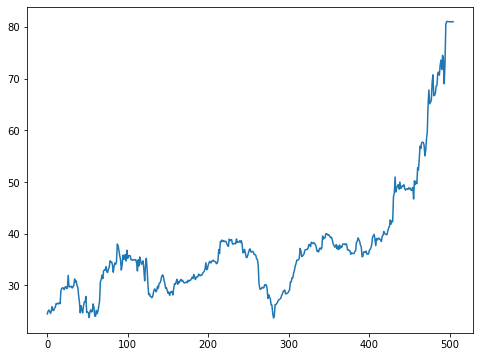

In [35]:
#plot
plt.figure(figsize=(8, 6))
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

---

In [51]:
df = pd.read_csv('Stocks1/aaap.us.txt', delimiter = ",")
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,2015-11-11,18.50,25.90,18.00,24.50,1584600,0
1,2015-11-12,24.25,27.12,22.50,25.00,83000,0
2,2015-11-13,25.47,26.20,24.55,25.26,67300,0
3,2015-11-16,25.01,26.19,24.13,25.02,16900,0
4,2015-11-17,24.46,25.51,24.38,24.62,25900,0
...,...,...,...,...,...,...,...
500,2017-11-06,80.75,81.10,80.75,80.96,2069416,0
501,2017-11-07,80.95,81.08,80.95,81.00,840857,0
502,2017-11-08,80.95,81.10,80.93,80.93,405681,0
503,2017-11-09,80.90,81.00,80.90,81.00,958151,0


In [49]:
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv('Stocks1/aaap.us.txt', delimiter = ",")

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

         Date   Open   High    Low  Close   Volume  OpenInt
0  2015-11-11  18.50  25.90  18.00  24.50  1584600        0
1  2015-11-12  24.25  27.12  22.50  25.00    83000        0
2  2015-11-13  25.47  26.20  24.55  25.26    67300        0
3  2015-11-16  25.01  26.19  24.13  25.02    16900        0
4  2015-11-17  24.46  25.51  24.38  24.62    25900        0

 Shape of the data:
(505, 7)

 Shape of training set:
(505, 2)

 Shape of validation set:
(0, 2)

 RMSE value on validation set:
nan


C:\Otro\Anaconda\envs\Class_test\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Otro\Anaconda\envs\Class_test\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount


In [56]:
!pip install keras

In [58]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (C:\Otro\Anaconda\envs\Class_test\lib\site-packages\tensorflow\python\eager\context.py)